In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
import os
os.chdir('C:/DBAR')
df=pd.read_csv('student_alcohol.csv')

In [3]:
df.shape

(395, 33)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

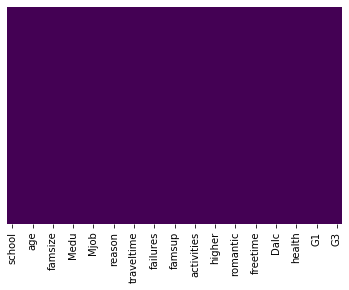

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## It seems that we don't have any missing values

## Correlation Heatmap

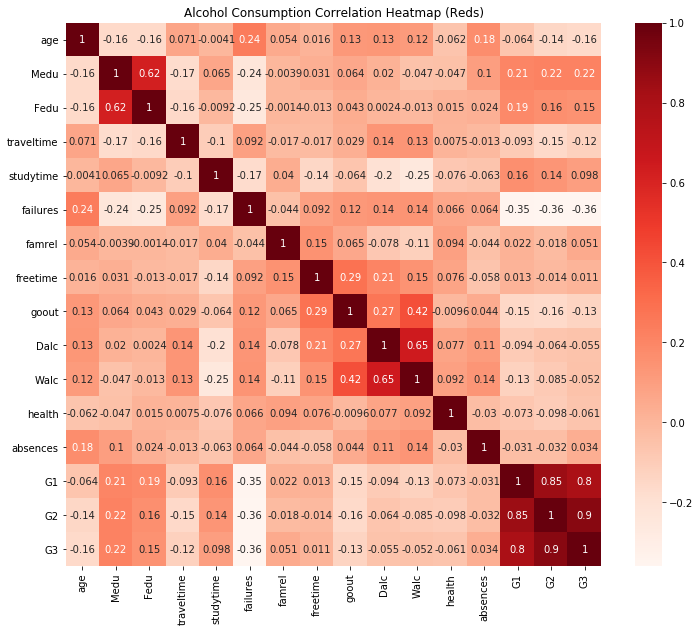

In [7]:
plt.subplots(figsize=(12,10))
ax = plt.axes()
ax.set_title("Alcohol Consumption Correlation Heatmap (Reds)")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds",annot=True)
plt.show()

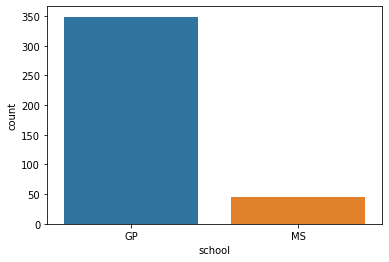

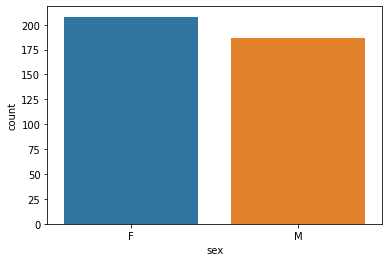

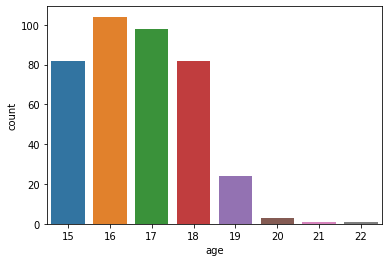

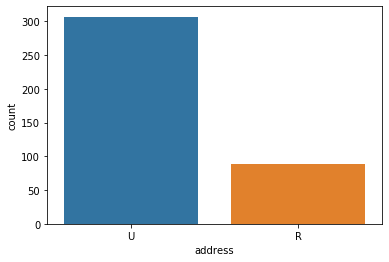

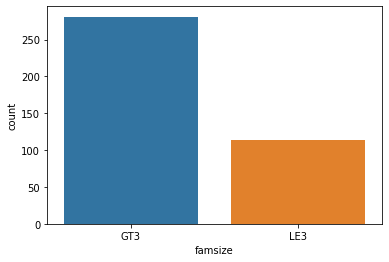

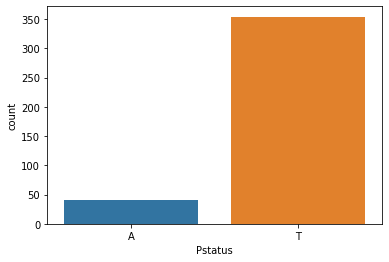

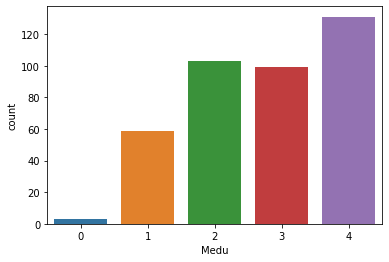

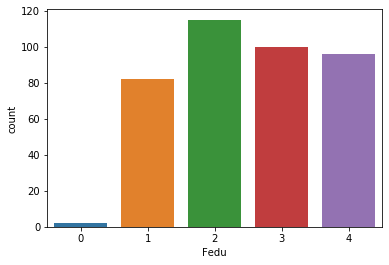

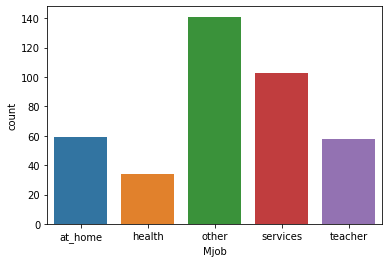

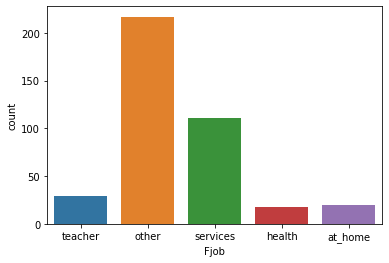

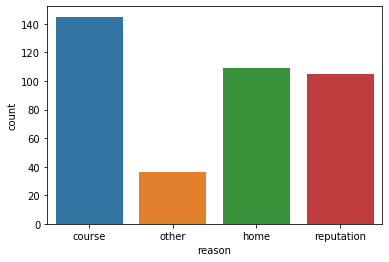

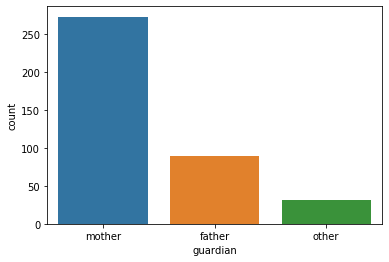

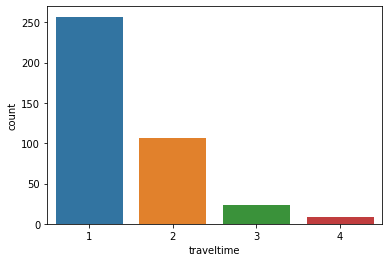

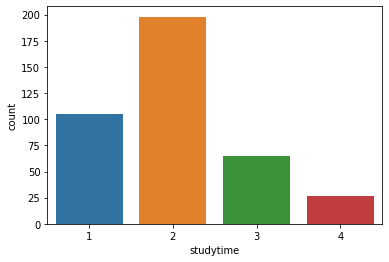

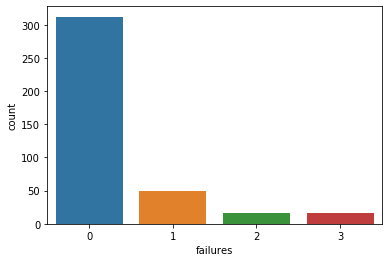

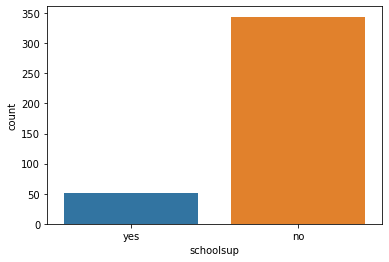

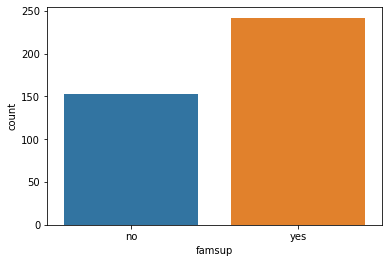

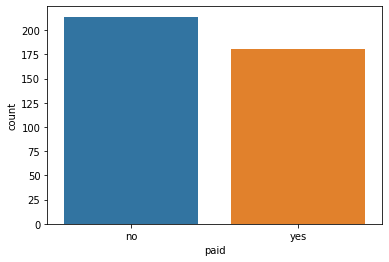

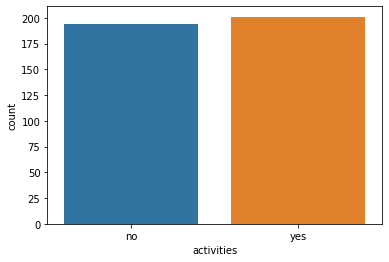

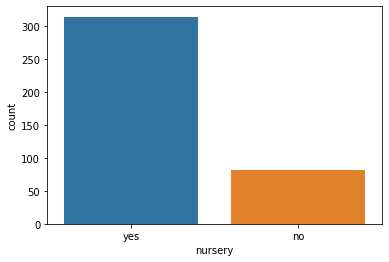

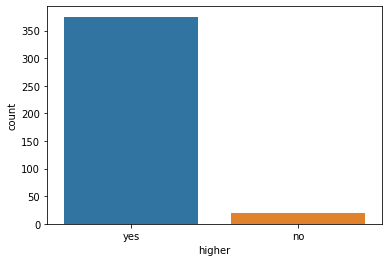

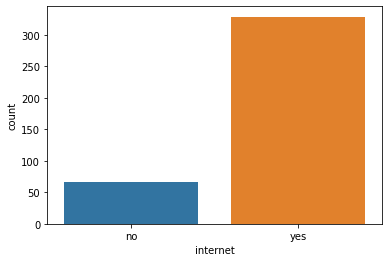

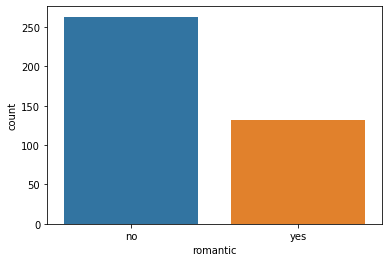

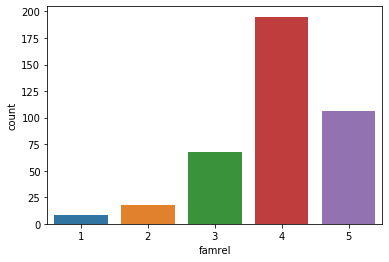

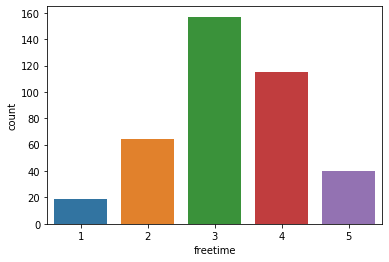

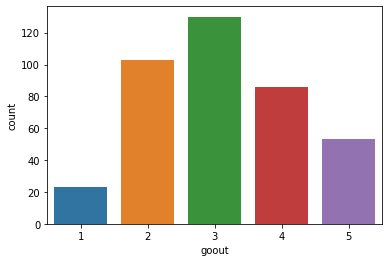

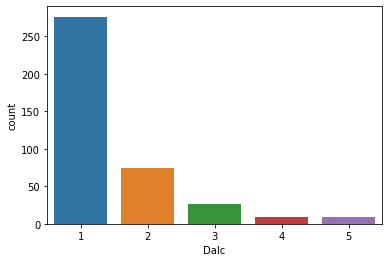

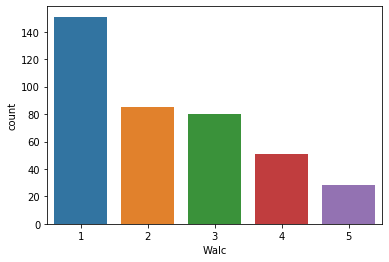

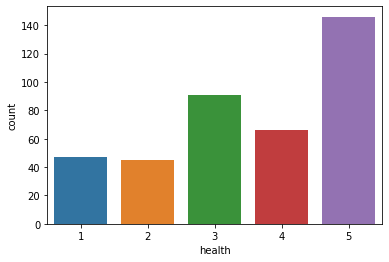

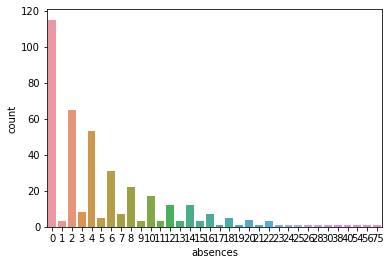

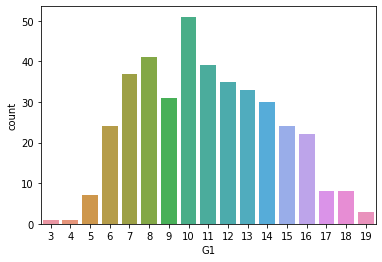

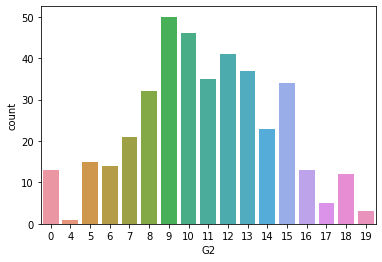

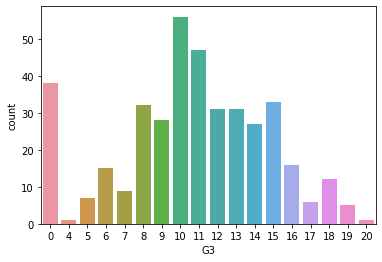

In [8]:
for col in df.columns:
    sns.countplot(col,data=df)
    plt.show()

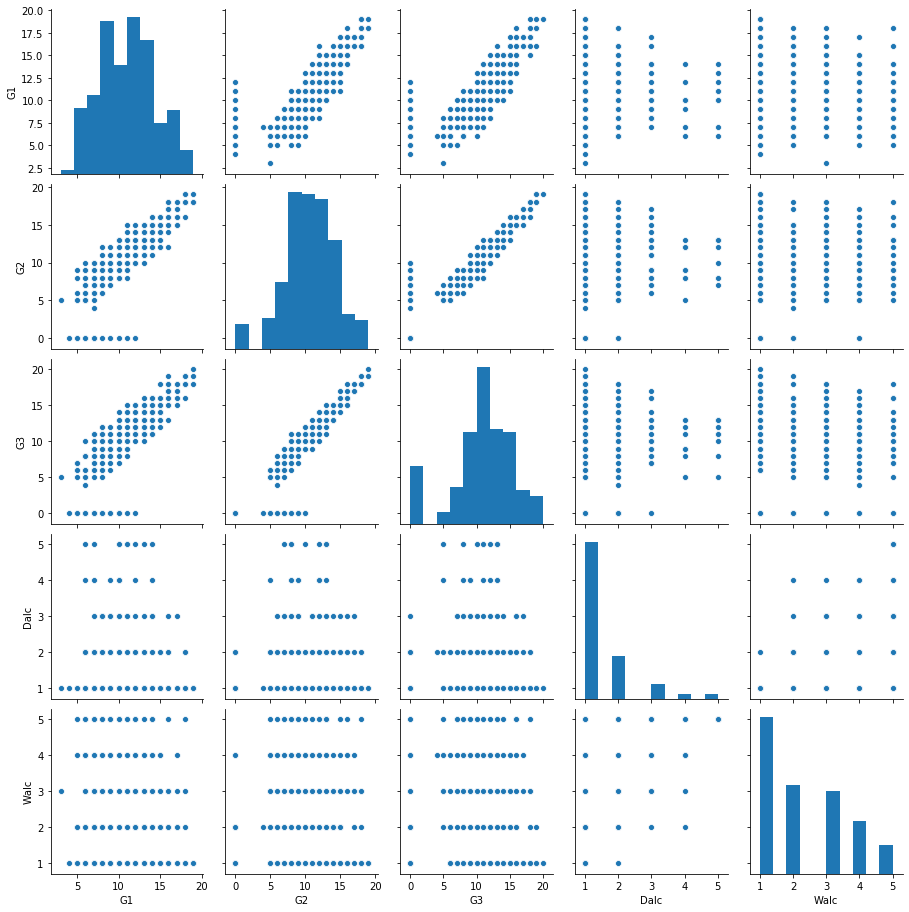

In [9]:
df2=pd.DataFrame(columns=['G1','G2','G3','Dalc','Walc'],data=df)
sns.pairplot(df2)

##  As there are many categorical variables we first encode them into numeric values

## Data Processing

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [18]:
df['romantic']=df['romantic'].map({'no':0,
                                   'yes':1})

In [20]:
df['internet']=df['internet'].map({'no':0,
                                  'yes':1})

In [21]:
df['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [22]:
df['higher']=df['higher'].map({'no':0,
                              'yes':1})

In [27]:
df['nursery']=df['nursery'].map({'no':0,
                                'yes':1})

In [28]:
df['activities']=df['activities'].map({'no':0,
                                      'yes':1})

In [29]:
df['paid']=df['paid'].map({'no':0,
                          'yes':1})

In [30]:
df['famsup']=df['famsup'].map({'no':0,
                              'yes':1})

In [31]:
df['schoolsup']=df['schoolsup'].map({'no':0,
                                    'yes':1})

In [32]:
df['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [33]:
df['guardian']=df['guardian'].map({'mother':0,
                                  'father':1,
                                  'other':2})

In [34]:
df['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [35]:
df['reason']=df['reason'].map({'course':0,
                              'home':1,
                              'reputation':2,
                              'other':3})

In [36]:
df['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [37]:
df['Fjob']=df['Fjob'].map({'other':0,
                          'services':1,
                          'teacher':2,
                          'at_home':3,
                          'health':4})

In [40]:
df['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [41]:
df['Mjob']=df['Mjob'].map({'other':0,
                          'services':1,
                          'teacher':2,
                          'at_home':3,
                          'health':4})

In [42]:
df['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [43]:
df['Pstatus']=df['Pstatus'].map({'T':0,
                                'A':1})

In [44]:
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [45]:
df['famsize']=df['famsize'].map({'GT3':0,
                                'LE3':1})

In [47]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [48]:
df['address']=df['address'].map({'U':0,
                                'R':1})

In [49]:
df['sex']=df['sex'].map({'F':0,
                        'M':1})

In [50]:
df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [51]:
df['school']=df['school'].map({'GP':0,
                              'MS':1})

In [52]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,1,4,4,3,2,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,0,1,1,3,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,0,1,1,3,0,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,0,4,2,4,1,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,0,3,3,0,0,...,4,3,2,1,2,5,4,6,10,10


In [53]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [54]:
x=df.drop(['G3'],axis=1)
y=df['G3']

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 46)

[15.92345191 10.6983996  12.5809796   4.45716271 10.42132079]


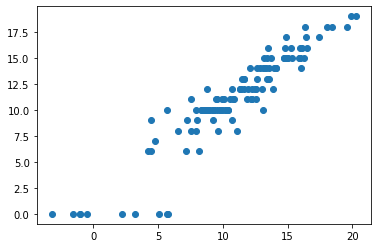

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

predictions = lm.predict(x_test)
print(predictions[:5])
plt.scatter(predictions, y_test)

In [57]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('The score of the grade G3')
print(lm.score(x_test, y_test))

MAE: 1.206950841662682
MSE: 2.74709481381077
RMSE: 1.657436217116897
The score of the grade G3
0.8603354336302155


## Implementing Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
clf=RandomForestRegressor(random_state=46)

In [61]:
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=46, verbose=0, warm_start=False)

In [62]:
clf.score(x_train,y_train)

0.9787476562504853

In [63]:
clf.score(x_test,y_test)

0.8701437749518913

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
clf = DecisionTreeRegressor(random_state=46)

In [66]:
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=46, splitter='best')

In [67]:
clf.score(x_train,y_train)

1.0

In [68]:
clf.score(x_test,y_test)

0.7825379843180056

## As the above models are seem to be overfitted so K-fold Cross Validation can be used to overcome this issue

In [69]:
from sklearn.neighbors import KNeighborsRegressor as KNN

## Checking consistency; using cross validation

In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = x_train, y = y_train, cv = 10)
score

array([0.83402836, 0.73468189, 0.90487284, 0.67737385, 0.82527006,
       0.74057245, 0.87986569, 0.78571429, 0.55334395, 0.83198422])

In [71]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(77.67707595711396, 9.933725907915738)

## Automating the process of CV for different k neighbors

In [72]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = x_train, y = y_train, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [73]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

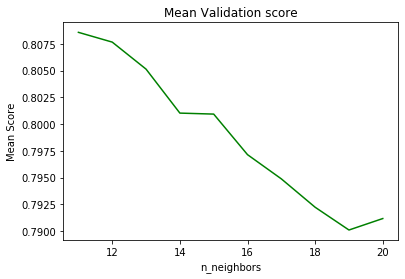

In [74]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

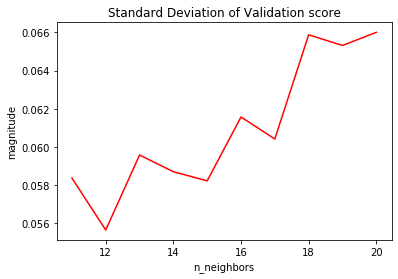

In [75]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

## implementing the optimal model over test set

In [77]:
clf = KNN(n_neighbors = 12 )
clf.fit(x_train, y_train)

score1 = clf.score(x_train, y_train)

score = clf.score(x_test, y_test)
score, score1

(0.8335686909013158, 0.8514228683892034)